In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta, datetime
import numpy as np

In [4]:
%matplotlib inline

In [2]:
data = pd.read_csv("../assets/data_prep_majority.txt", sep="\t")

In [46]:
data.tail()

,Flight,Date,Equipment_Type,Equipment_Reg,Origin_City,Origin_Code,Destination_City,Destination_Code,Flight Time,ETD,ETA,ATD,ATA,Carrier_Name,Carrier_Class,Timedelta,ETD_Group
158491,VY8721,2017-10-27,A321,EC-MOO,Dublin,DUB,Barcelona,BCN,1:54,15:10,18:45,15:51,18:45,Vueling,1,0,Afternoon
158492,VY8721,2017-10-26,A320,EC-LAB,Dublin,DUB,Barcelona,BCN,1:57,15:25,19:00,15:57,18:54,Vueling,1,-6,Afternoon
158493,VY8721,2017-10-25,A320,EC-HQJ,Dublin,DUB,Barcelona,BCN,2:00,15:05,18:40,15:20,18:21,Vueling,1,-19,Afternoon
158494,VY8721,2017-10-24,A320,EC-MEA,Dublin,DUB,Barcelona,BCN,1:55,15:05,18:40,15:26,18:21,Vueling,1,-19,Afternoon
158495,VY8721,2017-10-23,A320,EC-LVV,Dublin,DUB,Barcelona,BCN,1:52,15:05,18:40,15:34,18:26,Vueling,1,-14,Afternoon


In [7]:
len(data.Flight.unique())

231

In [8]:
len(data.Equipment_Type.unique())

43

In [9]:
len(data.Origin_City.unique())

21

In [10]:
len(data.Destination_City.unique())

12

In [11]:
len(data.Carrier_Name.unique())

13

In [12]:
len(data.Carrier_Class.unique())

2

In [48]:
max(data.Timedelta)

59

In [28]:
tdelta = data.ATA.apply(lambda x: datetime.strptime(x, '%H:%M')) - \
     data.ETD.apply(lambda x: datetime.strptime(x, '%H:%M'))

In [45]:
## 2k flights arrived before they started...
sum(tdelta.dt.days == -1), len(tdelta.dt.days)

(1982, 158496)

In [6]:
x = data.Carrier_Name.unique()
y = data.Origin_Code.unique()
len(x), len(y)

(13, 24)

In [7]:
values = data.groupby(["Carrier_Name", "Origin_Code"]).mean().Timedelta

In [8]:
values

Carrier_Name  Origin_Code
Aer Lingus    DUB            -8.416210
              LHR            -6.376005
              SNN             3.000000
Air Europa    AMS            -1.992239
              BCN           -14.531915
                               ...    
Vueling       AMS             5.934641
              BCN            -2.545006
              CPH             1.925255
              DUB            11.040639
              MAD           -17.662069
Name: Timedelta, Length: 90, dtype: float64

In [9]:
values["Aer Lingus", "DUB"]

-8.416209866875489

In [10]:
len(values)

90

In [34]:
heatmap = np.zeros((len(y), len(x)))

In [38]:
for i_1, val_1 in enumerate(y):
    for i_2, val_2 in enumerate(x):
        try:
            heatmap[i_1, i_2] = values[val_2, val_1]
            # print(values[val_1, val_2])
        except KeyError:
            # print(0)
            heatmap[i_1, i_2] = 0 

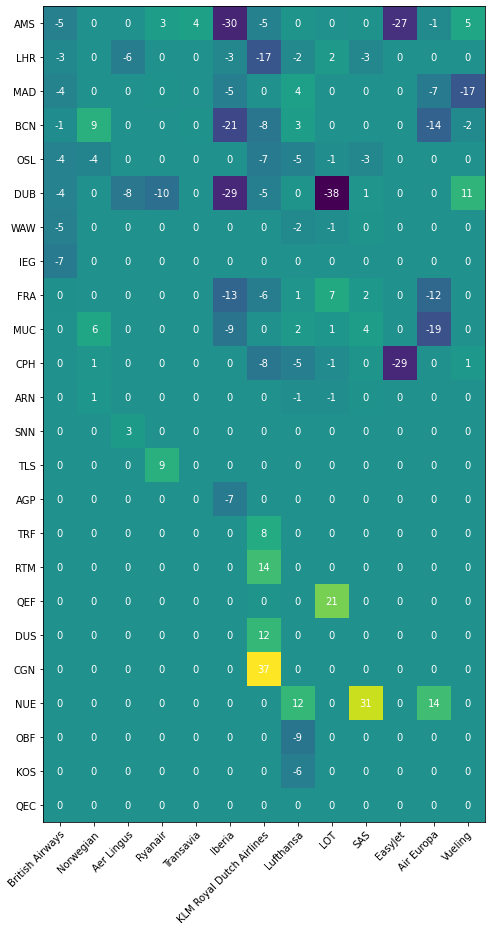

In [45]:
# from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(heatmap)

# We want to show all ticks...
ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
# ... and label them with the respective list entries
ax.set_xticklabels(x)
ax.set_yticklabels(y)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, int(heatmap[i, j]),
                       ha="center", va="center", color="w")

#fig.tight_layout()
plt.show()
